### Pytorch를 사용한 선형 SVM 모델 학습 및 결정 경계 시각화 실습

In [1]:
import torch
import torch.nn as nn 
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

#### 데이터생성

In [2]:
x = torch.randn(2500, 2)
y = torch.where(x[:,0] > x[:,1], 1, -1).float()

dataset = TensorDataset(x,y)
loader = DataLoader(dataset, batch_size=36)

#### SVM 모델 정의

In [3]:
class SVM(nn.Module) :
    def __init__(self) :
        super().__init__()
        self.linear = nn.Linear(2,1)
    
    def forward(self, x) :
        return self.linear(x)

#### 모델, 손실 함수, 옵티마이저 생성

In [4]:
model = SVM()
criterion  = nn.HingeEmbeddingLoss() 
# HingeEmbeddingLoss : 양성 1 음성 -1 클래스로 지정되어 있어야 사용가능
# 주어진 입력과 대상 사이의 경계선 손실값 계산하는 함수 -> 이진 분류 문제에서 사용
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [5]:
for epoch in range(100) :
    for inputs, targets in loader :
        output = model(inputs)
        loss = criterion(output.squeeze(), targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 10 == 0 :
        print(f"Epoch [{epoch+1}/100], Loss : {loss.item():.4f}")

Epoch [10/100], Loss : -2.3756
Epoch [20/100], Loss : -4.6890
Epoch [30/100], Loss : -6.9817
Epoch [40/100], Loss : -9.2703
Epoch [50/100], Loss : -11.5604
Epoch [60/100], Loss : -13.8507
Epoch [70/100], Loss : -16.1398
Epoch [80/100], Loss : -18.4284
Epoch [90/100], Loss : -20.7153
Epoch [100/100], Loss : -23.0023


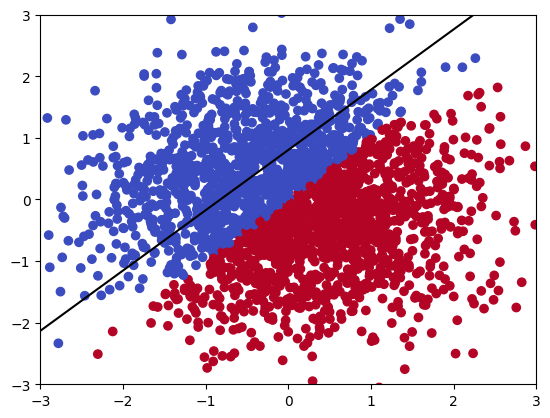

In [6]:
import matplotlib.pyplot as plt
import numpy as np

w = list(model.parameters())[0][0]
b = list(model.parameters())[1].item()
slope = (-w[0] / w[1]).detach().numpy()
intercept = (-b / w[1]).detach().numpy()
x_range = np.linspace(-3, 3, 100)
y_range = slope * x_range + intercept

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.plot(x_range, y_range, 'k-')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()